# Proyecto: Clasificación de muertes de civiles por policías en EUA (2015 - 2020)

## 1) Presentación de la empresa, organización o problema específico

Debido a la creciente problemática mundial de muertes civiles en ocación de encuentros con fuerzas policiales, hemos decidido analizar los datos relacionados a todos los civiles muertos por parte de la policía en Estados Unidos, para los años 2015 a 2020 ambos inclusive, con el relevamiento de distintas condiciones o variables relacionadas al evento (raza del civil, edad, género, si se encontraba armado, tipificación del encuentro con la policia, si el policia fue enjuiciado o no, ect.) y a la ciudad o estado donde ocurrió el hecho, para tratar de relacionar la incidencia de ciertas variables socioeconómicas de los estados. 

Específicamente, y a los efectos de resaltar una situación poco considerada relacionada a esta problemática social, los análisis se centrarán en la condición de si la victima poseía una enfermedad mental al momento del encuentro con la policía, a los efectos de que la información y conclusiones obtenidas sean de utilidad para entes gubernamentales o asociaciones sin fines de lucro, con el objetivo de desarrollar herramientas de contención para evitar que personas con problemas mentales terminen abatidas por la policia en encuentros evitables. 

## 2) Preguntas y objetivos de la investigación
Entre otras, se intentará analizar:
- Estimar si una víctima civil tiene signos de una enfermedad mental al momento del incidente con la policía
- ¿Cuál es la distribución por raza de las víctimas?
- ¿Cuál es la incidencia de los factores socioeconómicos y políticos de los estados en la cantidad de víctimas por millon de habitantes?
- ¿Cuáles son los estados con mayor cantidad de muertes por millón de habitantes?
- ¿Cuáles son las circunstancias más comúnes del encuentro entre el civil y la policía?, ¿los civiles generalmente están armados?

## 3) Conformación del equipo de trabajo
- Magdalena Gambuli
- Jese David Salazar Garcia
- Gonzalo Beloqui

Tutora: Corina Garrido

## 4) Indicación de la fuente del dataset y los criterios de selección (Data Acquisition)

Fuentes de dataset:
1. Datos de hechos y civiles: https://github.com/washingtonpost/data-police-shootings
2. Datos socioeconómicos de los estados: https://data.ers.usda.gov/
3. Datos de partido político y gobernador por Estado.
Fuente: https://www.openicpsr.org/openicpsr/project/102000/version/V3/view

# Criterios de Selección:
Trascendencia de la problemática
Oportunidad y completitud de los datos


## 5) Generación del primer Data Wrangling y EDA, apuntado a sus datos (insights) univariado, bivariado y multivariado.

## Data Wrangling

In [ ]:
# importación de librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import scipy
import numpy as np

In [ ]:
# importación Dataset_cIVILIANS
url_file = "https://raw.githubusercontent.com/gonezebel/DataScienceCoderhouse/main/01_DatasetCivilians.csv"
df_civilians = pd.read_csv(url_file, parse_dates=["Death_Date"], dayfirst=True, index_col="Victim_ID", encoding='utf-8')
df_civilians.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5793 entries, 2 to 5792
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Civil_Name               5793 non-null   object        
 1   Death_Date               5793 non-null   datetime64[ns]
 2   Manner_of_death          5793 non-null   object        
 3   Armed                    5793 non-null   object        
 4   Age                      5793 non-null   int64         
 5   Gender                   5793 non-null   object        
 6   Race                     5793 non-null   object        
 7   City                     5793 non-null   object        
 8   State_ID                 5793 non-null   int64         
 9   Signs_of_mental_illness  5793 non-null   bool          
 10  Flee                     5793 non-null   object        
 11  body_camera              5793 non-null   bool          
 12  longitude                5519 non-

In [ ]:
# importación Dataset_States
url_file = "https://raw.githubusercontent.com/gonezebel/DataScienceCoderhouse/main/Dataset_states_unique.csv"
df_states = pd.read_csv(url_file, dayfirst=True, encoding='utf-8',sep=';')
df_states.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      299 non-null    int64  
 1   GDP_Millions              299 non-null    int64  
 2   GDP_PerCapita             299 non-null    int64  
 3   Unemployment_Rate         299 non-null    float64
 4   Poverty_Percent           299 non-null    float64
 5   Median_household_ Income  299 non-null    int64  
 6   Governor_Name             299 non-null    object 
 7   Party                     299 non-null    object 
 8   State_Name                299 non-null    object 
 9   state_initial             299 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 23.5+ KB


In [ ]:
#Merge dataframes a través de campos "year" y "state_initial"
df = pd.merge(df_civilians,df_states, on =['state_initial','Year'],how='left')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5793 entries, 0 to 5792
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Civil_Name                5793 non-null   object        
 1   Death_Date                5793 non-null   datetime64[ns]
 2   Manner_of_death           5793 non-null   object        
 3   Armed                     5793 non-null   object        
 4   Age                       5793 non-null   int64         
 5   Gender                    5793 non-null   object        
 6   Race                      5793 non-null   object        
 7   City                      5793 non-null   object        
 8   State_ID                  5793 non-null   int64         
 9   Signs_of_mental_illness   5793 non-null   bool          
 10  Flee                      5793 non-null   object        
 11  body_camera               5793 non-null   bool          
 12  longitude           

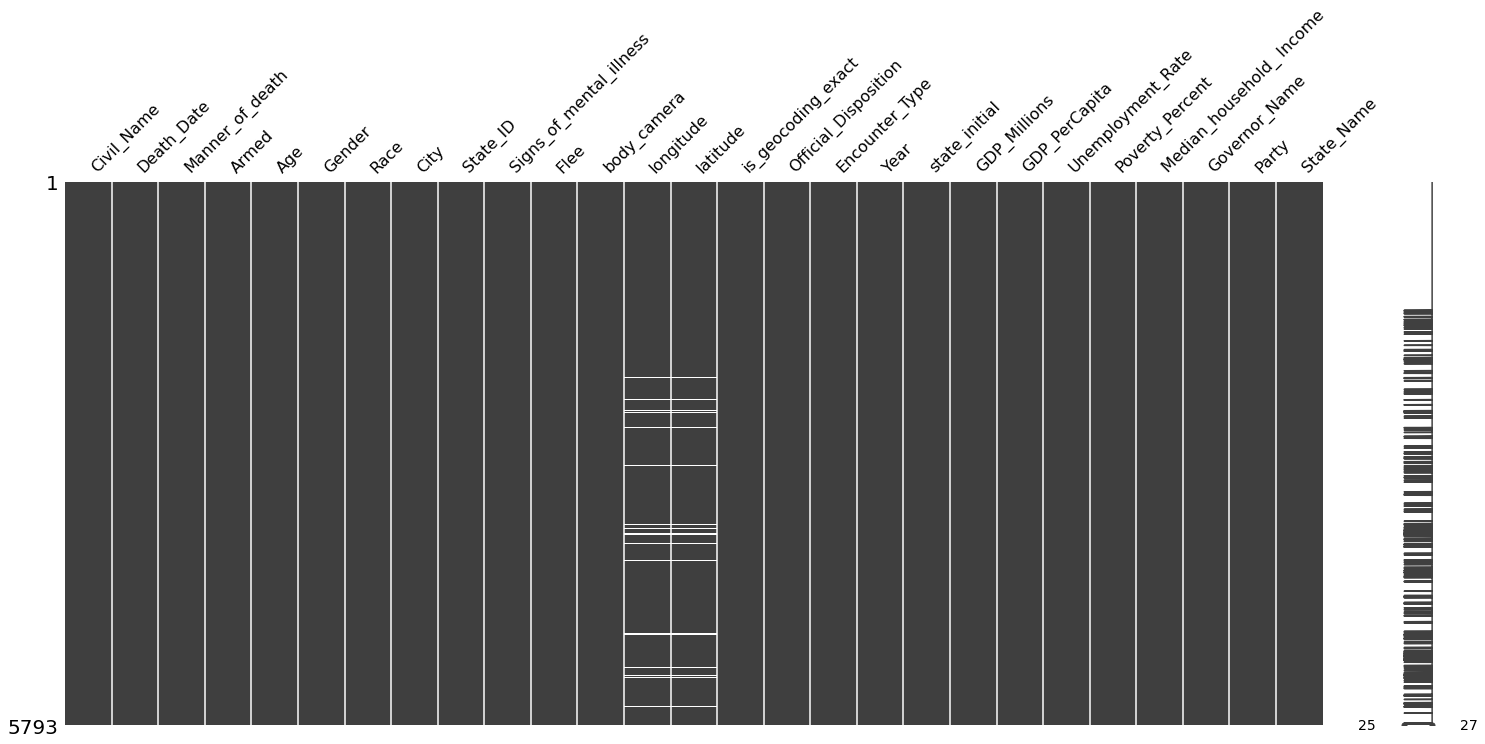

In [ ]:
# visualización de null
import missingno as msno
%matplotlib inline
msno.matrix(df)

En cuanto a los datos null es un dataset con poca información faltante como puede observarse en el gráfico superior.

In [ ]:
## verificación de campos y cantidad de nulls
df.isnull().sum()

Civil_Name                    0
Death_Date                    0
Manner_of_death               0
Armed                         0
Age                           0
Gender                        0
Race                          0
City                          0
State_ID                      0
Signs_of_mental_illness       0
Flee                          0
body_camera                   0
longitude                   274
latitude                    274
is_geocoding_exact            0
Official_Disposition          0
Encounter_Type                0
Year                          0
state_initial                 0
GDP_Millions                  0
GDP_PerCapita                 0
Unemployment_Rate             0
Poverty_Percent               0
Median_household_ Income      0
Governor_Name                 0
Party                         0
State_Name                    0
dtype: int64

In [ ]:
# corrección de nulls en columnas de longitud y latitud, considerando el promedio de cada campo para el resto entradas de dato agrupadas por estado.
df['longitude']=df.groupby('state_initial')['longitude'].apply(lambda x:x.fillna(x.mean()))
df['latitude']=df.groupby('state_initial')['latitude'].apply(lambda x:x.fillna(x.mean()))
df.isnull().sum()

Civil_Name                  0
Death_Date                  0
Manner_of_death             0
Armed                       0
Age                         0
Gender                      0
Race                        0
City                        0
State_ID                    0
Signs_of_mental_illness     0
Flee                        0
body_camera                 0
longitude                   0
latitude                    0
is_geocoding_exact          0
Official_Disposition        0
Encounter_Type              0
Year                        0
state_initial               0
GDP_Millions                0
GDP_PerCapita               0
Unemployment_Rate           0
Poverty_Percent             0
Median_household_ Income    0
Governor_Name               0
Party                       0
State_Name                  0
dtype: int64

In [ ]:
# Información general del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5793 entries, 0 to 5792
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Civil_Name                5793 non-null   object        
 1   Death_Date                5793 non-null   datetime64[ns]
 2   Manner_of_death           5793 non-null   object        
 3   Armed                     5793 non-null   object        
 4   Age                       5793 non-null   int64         
 5   Gender                    5793 non-null   object        
 6   Race                      5793 non-null   object        
 7   City                      5793 non-null   object        
 8   State_ID                  5793 non-null   int64         
 9   Signs_of_mental_illness   5793 non-null   bool          
 10  Flee                      5793 non-null   object        
 11  body_camera               5793 non-null   bool          
 12  longitude           

In [ ]:
df.sort_values(['Death_Date']).tail()

,Civil_Name,Death_Date,Manner_of_death,Armed,Age,Gender,Race,City,State_ID,Signs_of_mental_illness,...,Year,state_initial,GDP_Millions,GDP_PerCapita,Unemployment_Rate,Poverty_Percent,Median_household_ Income,Governor_Name,Party,State_Name
5786,Dolal Idd,2020-12-30,shot,Gun,23,M,B,Minneapolis,24,False,...,2020,MN,373739,68185,0.062,0.084,78461,Tim Walz,Democrat,Minnesota
5787,David Jacob Rigsby,2020-12-30,shot,Gun,39,M,W,Waverly,43,False,...,2020,TN,369574,55532,0.075,0.132,54665,Bill Lee,Republican,Tennessee
5790,Peter K. England,2020-12-30,shot,Gun,21,M,A,Ammon,13,False,...,2020,ID,83822,48033,0.054,0.092,66499,Brad Little,Republican,Idaho
5791,Jeffrey Marvin,2020-12-31,shot,Vehicle,63,M,B,Starke County,15,False,...,2020,IN,375337,56729,0.071,0.120,66360,Eric Holocomb,Republican,Indiana
5792,David Randall Shepherd,2020-12-31,shot,Gun,39,M,W,Beaumont,44,True,...,2020,TX,1775588,62712,0.076,0.140,68093,Greg Abbot,Republican,Texas


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,5793.0,37.151735,13.027632,6.000,27.000,35.000,46.000,91.000
State_ID,5793.0,23.220956,16.016562,1.000,6.000,21.000,38.000,51.000
longitude,5793.0,-97092.499267,16698.689607,-158137.000,-112043.000,-93821.000,-83031.000,-68014.000
latitude,5793.0,36745.258372,5429.512188,19498.000,33487.000,36122.000,40031.000,71301.000
Year,5793.0,2017.501813,1.721865,2015.000,2016.000,2017.000,2019.000,2020.000
GDP_Millions,5793.0,888231.360780,901917.626641,30988.000,241704.000,508241.000,1116435.000,3052645.000
GDP_PerCapita,5793.0,53233.106163,12926.038825,31522.000,43866.000,52217.000,58452.000,202455.000
Unemployment_Rate,5793.0,0.050648,0.017067,0.022,0.039,0.048,0.059,0.128
Poverty_Percent,5793.0,0.128232,0.028668,0.037,0.108,0.130,0.148,0.220
Median_household_ Income,5793.0,61999.227861,10206.590186,41754.000,54181.000,60097.000,69600.000,94384.000


## Análisis Univariado

### 1. Análisis de muertes mensuales

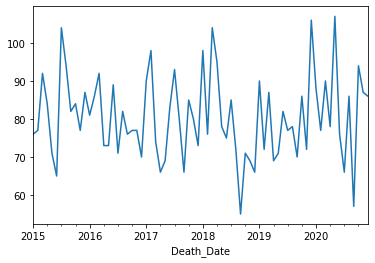

In [ ]:
muertes_mensuales = df.groupby(df['Death_Date'].dt.to_period('M')).size()
muertes_mensuales.plot()
plt.show()

In [ ]:
import plotly.express as px
fig = px.box(y=muertes_mensuales.values, points="all")
fig.show()

Al observar estos gráficos, nos llama la atención que la tendencia es muy irregular, sin embargo al visualizar las medidas de tendencia central, es de consideración que el total de civiles muertos mensualmente estén entre los 72 y 87.

### 2. Análisis de muertes por edad

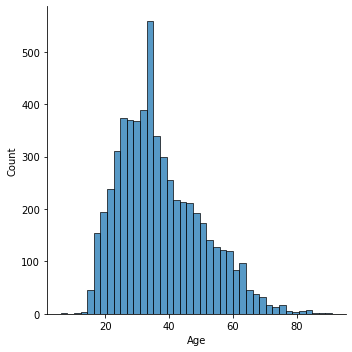

In [ ]:
sns.displot(df.Age, kde=False)
plt.show()

In [ ]:
scipy.stats.describe(df['Age'])

DescribeResult(nobs=5793, minmax=(6, 91), mean=37.151734852408076, variance=169.7192032225023, skewness=0.7075762930120995, kurtosis=0.12384936035072824)

In [ ]:
scipy.stats.mode(df['Age'])

ModeResult(mode=array([31]), count=array([204]))

La distribución por edad está muy marcado en el rango de edad entre los 20 y 40 años. En base al índice de curtosis y asimetría de la variable Age, podemos determinar que la distribución es asimétrica a la derecha, lo que significa que después de los 50 años baja la propensión a que la policía utilice la fuerza letal como respuesta. Esto se puede deber a múltiples motivos, por ejemplo que a partir de esa edad baje la tendencia a cometer crímenes más "violentos" que generen una respuesta de igual grado por parte de la policía, o que la misma policía de forma consciente/inconsciente no responde igual frente a la percibida amenaza de una persona de 20 años que una de +50 años.

### 3. Análisis de muertes por estado

In [ ]:
df['Month'] = df['Death_Date'].dt.month
df_1 = pd.DataFrame({'count': df.groupby(['State_Name', 'Month']).size()})
df_1 = df_1.reset_index()
df_1.head()

,State_Name,Month,count
0,Alabama,1,11
1,Alabama,2,12
2,Alabama,3,9
3,Alabama,4,5
4,Alabama,5,8


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning:

Using the barplot function without specifying `order` is likely to produce an incorrect plot.



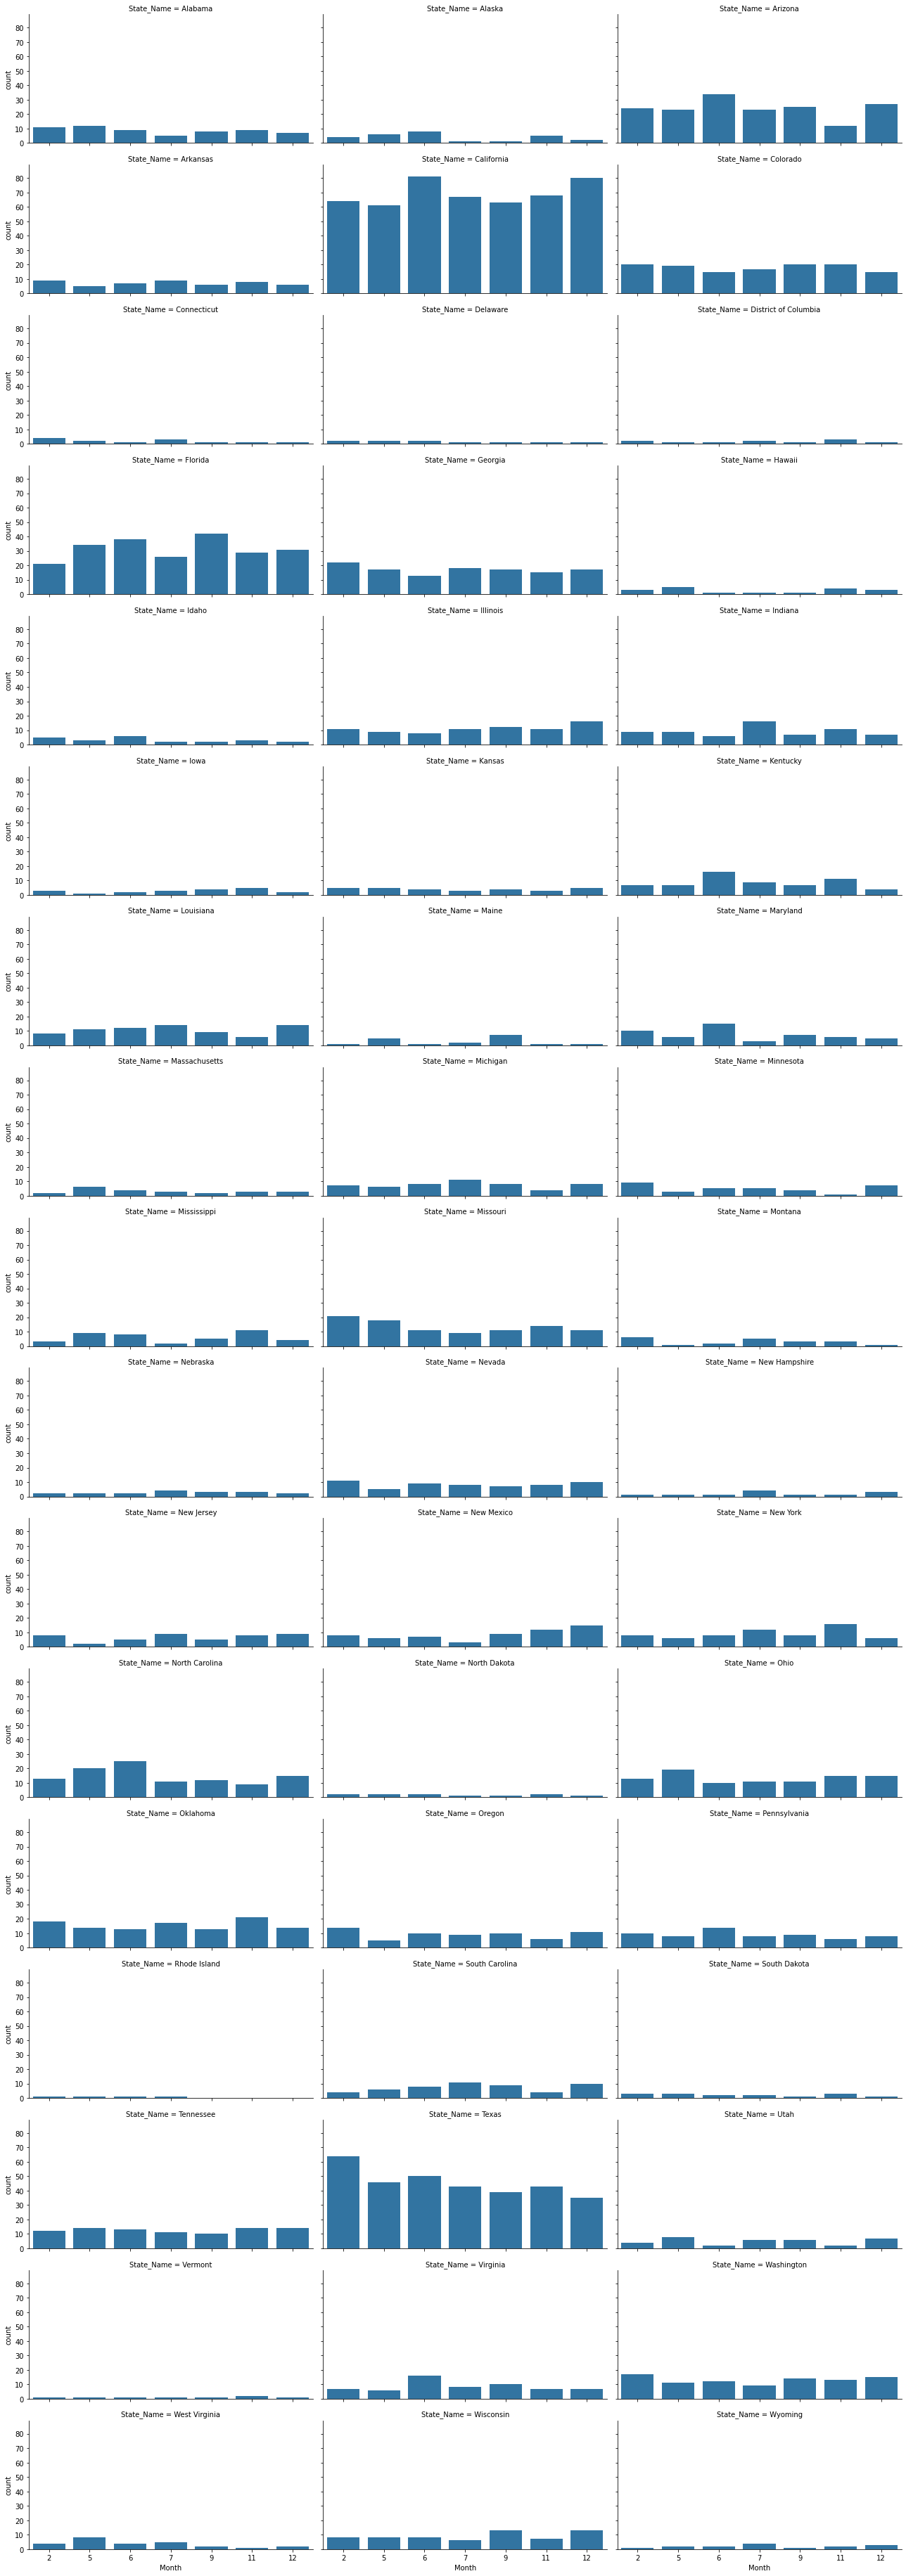

In [ ]:
chart = sns.FacetGrid(df_1, col='State_Name', margin_titles=True, col_wrap=3, aspect=2, row_order=df['State_Name'].unique)
chart.map(sns.barplot, 'Month', 'count',)
plt.show()

Obteniendo una estadística de los eventos ocurridos en cada mes, descubrimos que hay meses en los que no ha ocurrido alguna muerte (Enero, Marzo, Abril, Agosto y Octubre). El top 3 de los estados donde se han presentado más muertes son: California, Florida y Texas.

### 4. Análisis de muertes por Raza

In [ ]:
df_pie = df[['Race','State_ID']]
pie_race = df_pie.groupby('Race').agg('count')
pie_race=pie_race.rename(columns={'State_ID': 'Frecuencia'})
pie_race

,Frecuencia
Race,
A,106
B,1548
H,1087
N,85
O,48
W,2919


In [ ]:
import plotly.express as px
fig = px.pie(pie_race, values='Frecuencia', \
             names=pie_race.index, title='Piechart Races')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

El 50,4% de los fallecidos civiles por la policía en EEUU son de raza blanca, seguido por un 26,7% de raza afroamericana.

### 5. Análisis de llamadas al 911

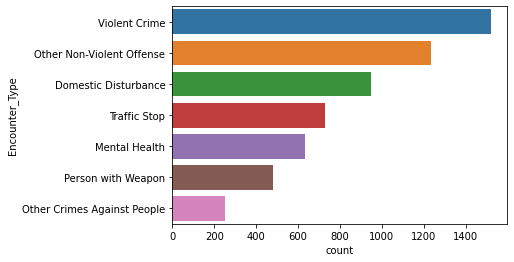

In [ ]:
sns.countplot(y='Encounter_Type', data=df, order=df['Encounter_Type'].value_counts().index)

Si bien la mayor cantidad de muertes civiles se producen en ocasión de crimen violento perpertrado por el civil abatido, la mayoría de los casos representan hechos o delitos no violentos, como "other non-violent offence", "domestic disturbance", o directamente "Mental Health". Este ultimo caso, que llega a pasar las 600 víctimas en el período 2015-2020, debiera ser de principal consideración dado que se trata de personas enfermas que son abatidas como si representaran amenaza de vida para otros.

La policía no esta preparada ni entrenada para poder asistir a personas con enfermedades mentales/transtornos que causen un comportamiento errático, y muchas veces eso conlleva a que se los vea como peligrosos.

### 6. Análisis de muertes por tipo de arma

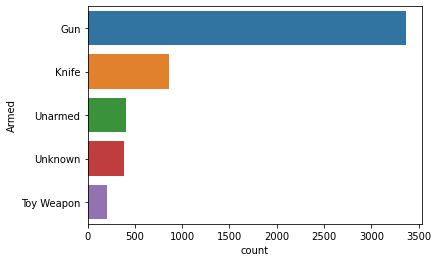

In [ ]:
sns.countplot(y='Armed', data=df, order=pd.value_counts(df['Armed']).iloc[:5].index)

En cuanto al análisis del tipo de arma poseida por los civiles abatidos, si bien predominan armas de fuego, hay más de 500 casos entre civiles desarmados y con armas de juguete, lo que configuraría un claro exceso policíaco.

### 7. Análisis de porcentaje de víctimas civiles con alguna enfermedad mental

In [ ]:
pie_mental = df.groupby('Signs_of_mental_illness')[['Age']].agg('count')
pie_mental = pie_mental.rename({'Age': 'Frecuencia'}, axis=1)

fig = px.pie(pie_mental, values='Frecuencia', names=pie_mental.index, title='Piechart Mental Illness conditions in civilian dead by police')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

Este gráfico nos muestra como el 23.8% de los civiles muertos tenían algún problema mental.

Según estudios de la NAMI (National Alliance on Mental Illness) en EE.UU. 1 de cada 5 adultos sufre de una enfermedad mental, y 1 de cada 20 sufre una enfermedad mental grave. Hay un claro exceso de brutalidad policial en este caso comparando los números, ya que los casos más graves de enfermedad son un 5,6% de la población, comparado al 23.8% que se observa que murió a manos de la policía.

## Analisis Bivariado

### 1) Histograma de muertes por edad y género

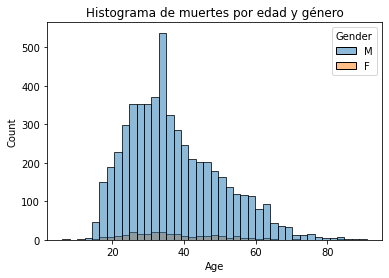

In [ ]:
sns.histplot(data=df, x="Age", hue="Gender")
plt.title("Histograma de muertes por edad y género")
plt.show()

Además de la distribución de edad observada anteriormente (marcada entre 20 y 40 años), se puede ver la diferencia en muertes entre hombres y mujeres. Probablemente se debe a que los números de mujeres que comiten un crimen es mucho más bajo comparado a los hombres.

### 2) Catplot de causa de intervención policíaca por año

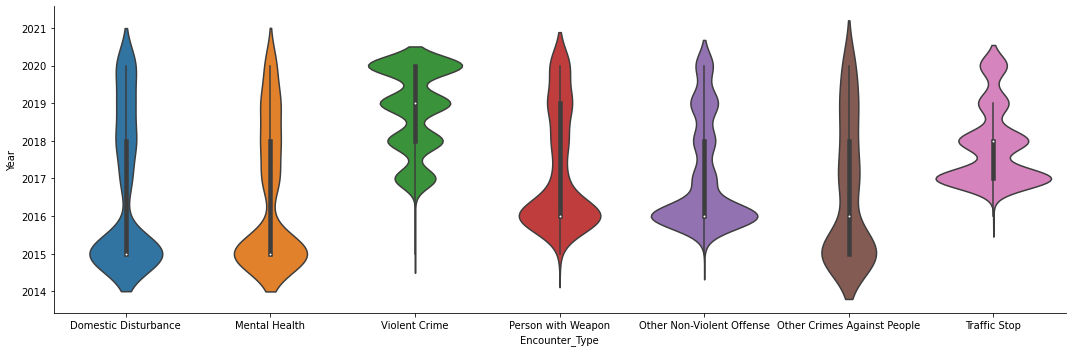

In [ ]:
sns.catplot(data=df, x="Encounter_Type", y="Year", kind="violin", height=5, aspect=15/5)

Podemos observar la variación de los reportes en las llamadas al 911, con aumentos marcados en los crímenes violentos con cada año.

### 3) Histograma de causa de intervención policíaca posteriores a 2018


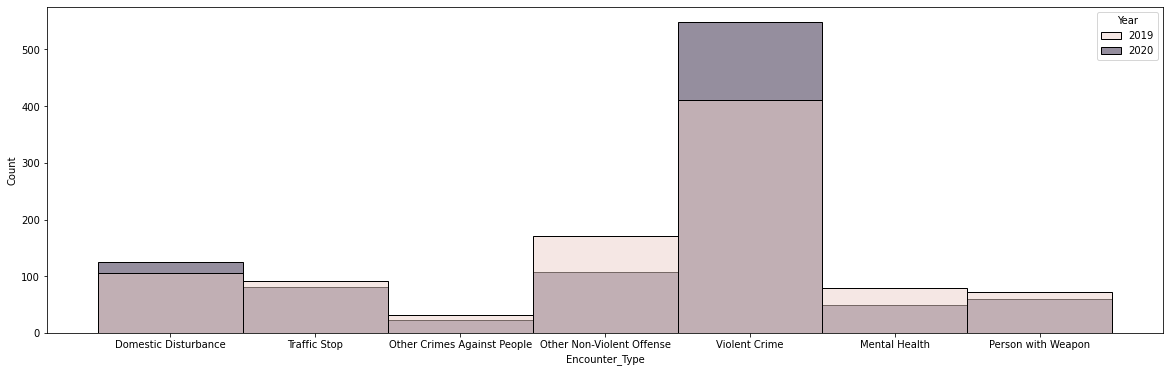

In [ ]:
df_covid = df[df['Year'] > 2018] 
plt.figure(figsize=(20,6))
sns.histplot(data=df_covid, x="Encounter_Type", hue='Year')

Parece haber un incremento marcado en los crímenes violentos entre 2019 y 2020, puede deberse a la situación política y sanitaria del país durante este año.

### 4) Catplot de tipo de arma utilizada por el civil por año

<Figure size 1440x432 with 0 Axes>

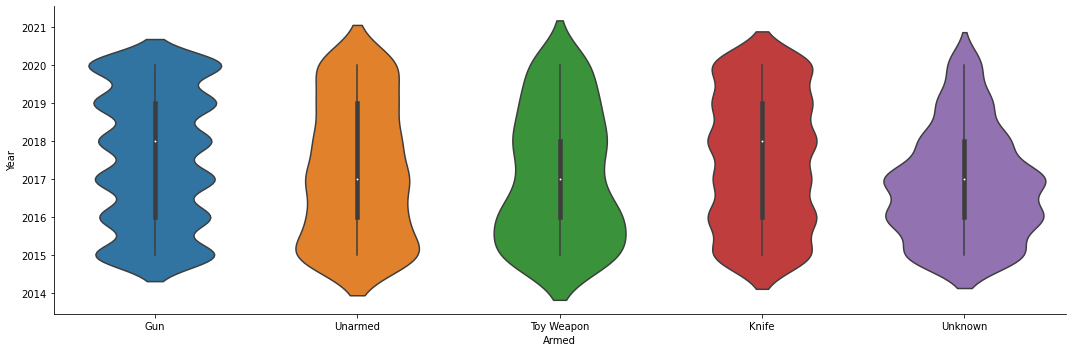

In [ ]:
df_armed = df.loc[df['Armed'].isin(['Gun','Knife','Unarmed','Unknown','Toy Weapon'])]
plt.figure(figsize=(20,6))
sns.catplot(data=df_armed, x="Armed", y="Year", kind="violin", height=5, aspect=15/5)

Las personas que portan arma de fuego han incrementando con el paso del tiempo, siendo más del triple que la segunda categoría, esto se alinea con el aumento de crímenes violentos y la facilidad para acceder a armas en EE.UU.

### 5) Distribución de estados por conteo de víctimas e ingreso medio por hogar

In [ ]:
#Dataset x estado
df_by_state = df[['Civil_Name','state_initial','Year','Median_household_ Income','Party']]
df_by_state_2020 = df_by_state[df_by_state.Year.isin([2020])]
df_by_state_2020 = df_by_state_2020.groupby(['Year','Party','state_initial','Median_household_ Income']).agg({'Civil_Name':'count'}).reset_index()
df_by_state_2020 = df_by_state_2020.rename(columns={'Civil_Name':'Victims_Count'},inplace=False)
df_by_state_2020.head()

,Year,Party,state_initial,Median_household_ Income,Victims_Count
0,2020,Democrat,AK,44966,0
1,2020,Democrat,AK,50540,0
2,2020,Democrat,AK,50822,0
3,2020,Democrat,AK,50935,0
4,2020,Democrat,AK,51615,0


Text(0.5, 1.0, 'Distribution of Victims Counts per state and Median Household Income')

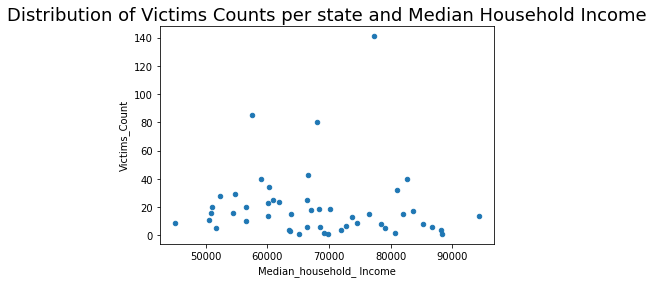

In [ ]:
df_by_state_2020.plot.scatter(x='Median_household_ Income', y='Victims_Count')
plt.title("Distribución de estados por conteo de víctimas e ingreso medio por hogar" , size = 18 )

Al contraro de lo que pudiera suponerse, al menos en 2020, los estados con menor ingreso medio por hogar no fueron, generalmente los que mas muertes de civiles por parte de la policía tuvieron. Solo hay un caso a analizar, que está entre USD 50K y USd 60K anuales y tiene más de 80 muertes en el año, además del caso que tiene 140 (CA), aunque está de la media hacia arriba en cuanto a ingreso medio.

### 6) Bar Catplot de frecuencia de victimas con signos de enfermedad mental por género

In [ ]:
#Comparación Razas vs Mental Illenes
df_race_mental = df[['Race','Signs_of_mental_illness','Civil_Name']]
plot_race_mental = df_race_mental.groupby(['Race','Signs_of_mental_illness'], as_index=False)['Civil_Name'].count()
plot_race_mental = plot_race_mental.rename(columns={'Civil_Name': 'Frequency'})
plot_race_mental.set_index('Race')
plot_race_mental

,Race,Signs_of_mental_illness,Frequency
0,A,False,77
1,A,True,29
2,B,False,1293
3,B,True,255
4,H,False,887
5,H,True,200
6,N,False,70
7,N,True,15
8,O,False,38
9,O,True,10


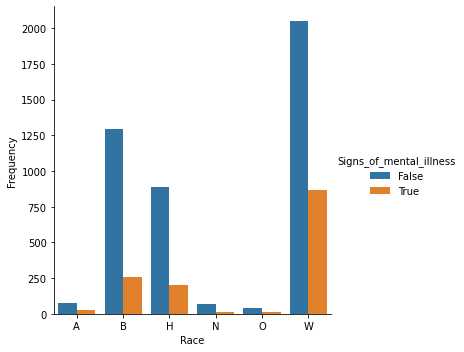

In [ ]:
sns.catplot(x="Race", y="Frequency", kind="bar", hue="Signs_of_mental_illness", data=plot_race_mental)

Comparando la cantidad de civiles muertos por raza y signo de enfermedad mental, podemos observar que la proporción de civiles con signos de enfermedad mental al momento de ser abatidos por la policía es mucho mas significativa para la raza blanca y asiática, con casi la mitad de civiles con dichas características.

# Análisis Multivariado

In [ ]:
df_biv = df.copy()
columns_drop = ['Manner_of_death', 'Civil_Name', 'Death_Date', 'City', 'longitude', 'latitude', 'is_geocoding_exact', 'Governor_Name', 'State_Name', 'state_initial']
df_biv.drop(columns=columns_drop, axis=1, inplace=True)

for col in ['Armed', 'Gender', 'Race', 'Signs_of_mental_illness', 'Flee', 'body_camera', 'Official_Disposition', 'Encounter_Type', 'Party']:
    df[col] = df[col].astype('category')

df_biv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5793 entries, 0 to 5792
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Armed                     5793 non-null   category
 1   Age                       5793 non-null   int64   
 2   Gender                    5793 non-null   category
 3   Race                      5793 non-null   category
 4   State_ID                  5793 non-null   int64   
 5   Signs_of_mental_illness   5793 non-null   category
 6   Flee                      5793 non-null   category
 7   body_camera               5793 non-null   category
 8   Official_Disposition      5793 non-null   category
 9   Encounter_Type            5793 non-null   category
 10  Year                      5793 non-null   int64   
 11  GDP_Millions              5793 non-null   int64   
 12  GDP_PerCapita             5793 non-null   int64   
 13  Unemployment_Rate         5793 non-null   float6

In [ ]:
for col in ['Armed', 'Gender', 'Race', 'Signs_of_mental_illness', 'Flee', 'body_camera', 'Official_Disposition', 'Encounter_Type', 'Party']:
    df_biv[col] = df[col].cat.codes

df_biv.head()

,Armed,Age,Gender,Race,State_ID,Signs_of_mental_illness,Flee,body_camera,Official_Disposition,Encounter_Type,Year,GDP_Millions,GDP_PerCapita,Unemployment_Rate,Poverty_Percent,Median_household_ Income,Party
0,11,47,1,5,38,0,2,0,4,0,2015,218711,48094,0.055,0.154,58400,0
1,11,53,1,0,48,1,2,0,4,0,2015,450575,54161,0.054,0.122,69200,0
2,25,23,1,2,17,0,2,0,4,0,2015,147832,45470,0.042,0.130,58200,2
3,11,18,1,5,37,0,2,0,4,0,2015,176833,43288,0.043,0.161,52400,2
4,24,32,1,5,5,1,2,0,4,0,2015,2496710,53855,0.063,0.153,69600,0


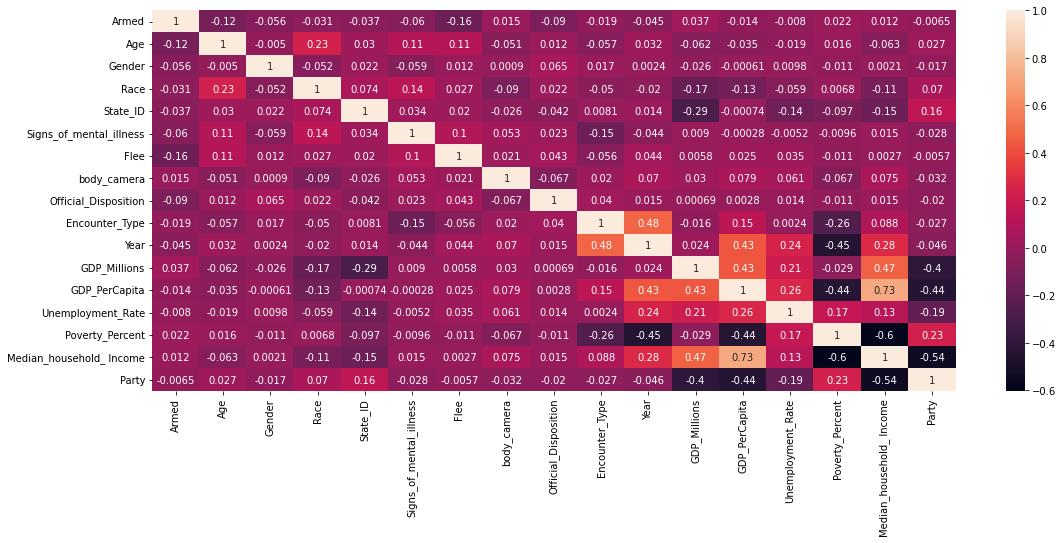

In [ ]:
plt.figure(figsize=(18, 7))
sns.heatmap(df_biv.corr(), annot=True)

Analizando el heatmap de los datos, son de interés algunas correlaciones fuertes que son generadas por las situaciones económicas del estado. Entre los features de interés como la edad, raza, signos de problemas mentales, si estaba armado o el año en que murió, no visualizamos una relación fuerte entre las demás variables.

In [ ]:
#Análisis de Cantidad de muertes por millón por estado en relación con Nivel de pobreza  y educación por estado y partido político en 2020
df_by_state = df[['Civil_Name','state_initial','Year','Median_household_ Income','Party','Poverty_Percent','Unemployment_Rate','GDP_Millions','GDP_PerCapita']]
df_by_state_2020 = df_by_state[df_by_state.Year.isin([2020])]
df_by_state_2020 = df_by_state_2020.groupby(['Year','Party','state_initial','Poverty_Percent','Unemployment_Rate','GDP_Millions','GDP_PerCapita']).agg({'Civil_Name':'count'}).reset_index()
df_by_state_2020 = df_by_state_2020.rename(columns={'Civil_Name':'Victims_Count'},inplace=False)
df_by_state_2020['Population'] = ((df_by_state_2020['GDP_Millions']*1000000)/df_by_state_2020['GDP_PerCapita'])
df_by_state_2020['Population'] = (df_by_state_2020['Population'].round(0))
df_by_state_2020['Victims_per_million'] = ((df_by_state_2020['Victims_Count'])/(df_by_state_2020['Population']/1000000)).round(2)
df_by_state_2020_top10 = df_by_state_2020.nlargest(10,['Victims_per_million'])
df_by_state_2020_top10

,Year,Party,state_initial,Poverty_Percent,Unemployment_Rate,GDP_Millions,GDP_PerCapita,Victims_Count,Population,Victims_per_million
23,2020,Republican,AK,0.133,0.078,49820,72263,9,689426.0,13.05
36,2020,Republican,MT,0.110,0.059,51509,49856,10,1033155.0,9.68
16,2020,Democrat,NV,0.129,0.128,170944,58452,25,2924519.0,8.55
15,2020,Democrat,NM,0.165,0.084,98472,49838,16,1975842.0,8.10
41,2020,Republican,OK,0.155,0.061,188057,49445,28,3803357.0,7.36
1,2020,Democrat,CO,0.095,0.073,382585,69475,40,5506801.0,7.26
26,2020,Republican,AZ,0.108,0.079,373719,51865,43,7205611.0,5.97
46,2020,Republican,UT,0.074,0.047,197562,61027,17,3237288.0,5.25
9,2020,Democrat,LA,0.154,0.083,235437,53996,20,4360267.0,4.59
8,2020,Democrat,KY,0.139,0.066,212540,48484,20,4383714.0,4.56


Text(0.5, 1.0, 'Poverty Percent, Unemployment Rate and Civilians deaths per millons top 10 US States')

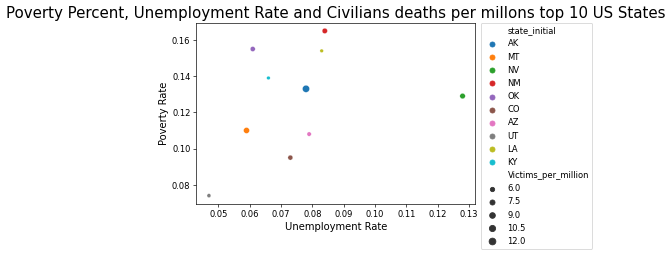

In [ ]:
plt.figure(dpi = 60)
sns.scatterplot(data=df_by_state_2020_top10, x='Unemployment_Rate', y='Poverty_Percent',hue='state_initial', size='Victims_per_million')
plt.xlabel( "Unemployment Rate" , size = 12 ) 
plt.ylabel( "Poverty Rate" , size = 12 ) 
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.title( "Poverty Percent, Unemployment Rate and Civilians deaths per millons top 10 US States" , size = 18 ) 

### Mapa de calor de victimas por millón con signos de problemas mentales en 2020

In [ ]:
# Preparar datos para generar el análisis de victimas con problemas mentales por millón
df_mental_state = df[['Civil_Name','state_initial','Year','State_Name','Signs_of_mental_illness','GDP_PerCapita','GDP_Millions','longitude','latitude']]
df_mental_state_2020 = df_mental_state[df_mental_state.Year.isin([2020])]
df_mental_state_2020 = df_mental_state_2020.groupby(['Year','state_initial','Signs_of_mental_illness','State_Name','GDP_PerCapita','GDP_Millions','longitude','latitude']).agg({'Civil_Name':'count'}).reset_index()
mental_state_2020_true = df_mental_state_2020[df_mental_state_2020["Signs_of_mental_illness"] == True]
mental_state_2020_true = mental_state_2020_true.rename(columns={'Civil_Name':'Victims_Count'},inplace=False)
mental_state_2020_true['Population'] = ((mental_state_2020_true['GDP_Millions']*1000000)/mental_state_2020_true['GDP_PerCapita'])
mental_state_2020_true['Population'] = (mental_state_2020_true['Population'].round(0))
mental_state_2020_true['Victims_with_mental_illness_per_million'] = ((mental_state_2020_true['Victims_Count'])/(mental_state_2020_true['Population']/1000000)).round(2)
mental_state_2020_true.head()

,Year,state_initial,Signs_of_mental_illness,State_Name,GDP_PerCapita,GDP_Millions,longitude,latitude,Victims_Count,Population,Victims_with_mental_illness_per_million
6,2020,AK,True,Alaska,72263,49820,-149558.000000,61309.000000,1,689426.0,1.45
19,2020,AL,True,Alabama,46875,226896,-88229.000000,30762.000000,1,4840448.0,0.21
20,2020,AL,True,Alabama,46875,226896,-88169.000000,30464.000000,1,4840448.0,0.21
21,2020,AL,True,Alabama,46875,226896,-87894.000000,30589.000000,1,4840448.0,0.21
22,2020,AL,True,Alabama,46875,226896,-87068.453608,33094.556701,1,4840448.0,0.21


In [ ]:
pip install folium

In [ ]:
import folium  #needed for interactive map
from folium.plugins import HeatMap

In [ ]:
max_amount = float(mental_state_2020_true['Victims_with_mental_illness_per_million'].max())

folium_hmap = folium.Map(location=[45, -100],
                        zoom_start=4,
                        tiles="OpenStreetMap")

hm_wide = HeatMap( list(zip(mental_state_2020_true['latitude']/1000, mental_state_2020_true['longitude']/1000, mental_state_2020_true['Victims_with_mental_illness_per_million'].astype(int))),
                   min_opacity=0.8,
                   max_val=max_amount,
                   radius=10, blur=6, 
                   max_zoom=15, 
                 )

folium_hmap.add_child(hm_wide)

Observamos que hay un marcado contraste desde el noroeste hasta el sureste del país en comparación con el resto. Creemos que esto se debe principalmente por que la densidad de la población se concentra mayormente en esta parte del país según datos demográficos (https://datosmacro.expansion.com/demografia/poblacion/usa-estados), además de que es la zona que más aporta al pib (https://es.statista.com/estadisticas/598677/producto-interior-bruto-pib-en-los-ee-uu-por-estado-en/).

# Modelos de análisis

### Modelo para clasificar la manera en que murió (Shot / Shot and Tasered). Utilizaremos el algoritmo MLP Classifier.

In [ ]:
# Crear df para el modelo
columns_drop = ['Manner_of_death', 'Civil_Name', 'Death_Date', 'City', 'longitude', 'latitude', 'is_geocoding_exact', 'Governor_Name', 'State_Name', 'state_initial']
df_model = df.copy()
df_model.drop(columns=columns_drop, axis=1, inplace=True)
df_model.dtypes

Armed                        object
Age                           int64
Gender                       object
Race                         object
State_ID                      int64
Signs_of_mental_illness        bool
Flee                         object
body_camera                    bool
Official_Disposition         object
Encounter_Type               object
Year                          int64
GDP_Millions                  int64
GDP_PerCapita                 int64
Unemployment_Rate           float64
Poverty_Percent             float64
Median_household_ Income      int64
Party                        object
dtype: object

In [ ]:
# Transformar las variables categoricas en dummies
columns_cat = ['Armed', 'Gender', 'Race', 'Signs_of_mental_illness', 'Flee',
       'body_camera', 'Official_Disposition', 'Encounter_Type', 'Party']

for column in columns_cat:
  df_model[column] = df_model[column].astype('category').cat.codes

df_model.dtypes

Armed                          int8
Age                           int64
Gender                         int8
Race                           int8
State_ID                      int64
Signs_of_mental_illness        int8
Flee                           int8
body_camera                    int8
Official_Disposition           int8
Encounter_Type                 int8
Year                          int64
GDP_Millions                  int64
GDP_PerCapita                 int64
Unemployment_Rate           float64
Poverty_Percent             float64
Median_household_ Income      int64
Party                          int8
dtype: object

In [ ]:
# Normalizar data frame
t = df_model[['Armed', 'Age', 'Gender', 'Race', 'State_ID', 'Signs_of_mental_illness',
       'Flee', 'body_camera', 'Official_Disposition', 'Encounter_Type', 'Year',
       'GDP_Millions', 'GDP_PerCapita', 'Unemployment_Rate', 'Poverty_Percent',
       'Median_household_ Income', 'Party']]
normalized_df=(t-df_model.mean())/t.std() # Normalizando los datos
normalized_df['Outcome']= df['Manner_of_death']
normalized_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Armed,5793.0,7.460323e-16,1.0,-2.401392,-0.560193,-0.560193,-0.225429,2.117915
Age,5793.0,2.494456e-16,1.0,-2.391205,-0.779246,-0.165167,0.679192,4.133388
Gender,5793.0,7.657338e-17,1.0,-4.640812,0.215442,0.215442,0.215442,0.215442
Race,5793.0,4.704793e-16,1.0,-1.759631,-1.216381,0.956619,0.956619,0.956619
State_ID,5793.0,7.539474e-17,1.0,-1.387374,-1.075197,-0.138666,0.922735,1.734395
Signs_of_mental_illness,5793.0,-2.573694e-15,1.0,-0.558361,-0.558361,-0.558361,-0.558361,1.790647
Flee,5793.0,-3.311504e-16,1.0,-1.675835,-0.697392,0.281051,0.281051,2.237938
body_camera,5793.0,4.740727e-15,1.0,-0.386201,-0.386201,-0.386201,-0.386201,2.588880
Official_Disposition,5793.0,-4.303096e-16,1.0,-13.365928,0.091762,0.091762,0.091762,0.091762
Encounter_Type,5793.0,1.065423e-14,1.0,-1.543237,-1.085270,-0.169336,1.204564,1.204564


In [ ]:
# MLP Classifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

columns_df = ['Armed', 'Age', 'Gender', 'Race', 'State_ID', 'Signs_of_mental_illness',
       'Flee', 'body_camera', 'Official_Disposition', 'Encounter_Type', 'Year',
       'GDP_Millions', 'GDP_PerCapita', 'Unemployment_Rate', 'Poverty_Percent',
       'Median_household_ Income', 'Party']
X_train, X_test, y_train, y_test = train_test_split(normalized_df[columns_df],
                                                    normalized_df.Outcome, stratify=normalized_df.Outcome, random_state=42)

In [ ]:
clf = MLPClassifier(random_state=42).fit(X_train, y_train)
clf.predict_proba(X_test[:1])

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


array([[0.99335197, 0.00664803]])

In [ ]:
y_pred = clf.predict(X_test)
y_pred

array(['shot', 'shot', 'shot', ..., 'shot', 'shot', 'shot'], dtype='<U16')

In [ ]:
clf.score(X_test, y_test)

0.9468599033816425

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

accuracy_score(y_test, y_pred)

0.9468599033816425

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[1371,    4],
       [  73,    1]])

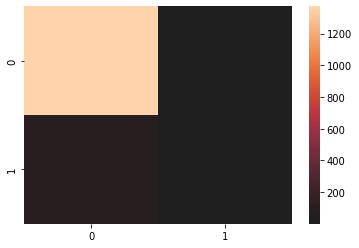

In [ ]:
sns.heatmap(cm, center=True)
plt.show()

### Modelo para predecir si la victima sufría algún problema mental

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [ ]:
# Crear df para el modelo
columns_drop = ['Civil_Name', 'Death_Date', 'City', 'longitude', 'latitude', 'is_geocoding_exact', 'Governor_Name', 'State_Name', 'state_initial', 'Signs_of_mental_illness']
df_model = df.copy()
df_model.drop(columns=columns_drop, axis=1, inplace=True)

# Transformar las variables categoricas en dummies
for column in df_model.columns:
  if df_model[column].dtype == 'object':
    df_model[column] = df_model[column].astype('category').cat.codes

df_model.dtypes

Manner_of_death                int8
Armed                          int8
Age                           int64
Gender                         int8
Race                           int8
State_ID                      int64
Flee                           int8
body_camera                    bool
Official_Disposition           int8
Encounter_Type                 int8
Year                          int64
GDP_Millions                  int64
GDP_PerCapita                 int64
Unemployment_Rate           float64
Poverty_Percent             float64
Median_household_ Income      int64
Party                          int8
dtype: object

In [ ]:
# Normalizar data
from sklearn.preprocessing import StandardScaler
X = df_model.values
X = np.nan_to_num(X) # Remplazar nan por valores numericos
X_f = StandardScaler().fit_transform(X)
X_f

array([[-0.23163738, -0.56024114,  0.75601729, ...,  0.89892309,
        -0.35266808, -1.26149927],
       [-0.23163738, -0.56024114,  1.21661656, ..., -0.21740505,
         0.70556313, -1.26149927],
       [ 4.31709256,  1.78330522, -1.08637979, ...,  0.06167699,
        -0.37226495,  0.79647462],
       ...,
       [-0.23163738, -0.56024114, -1.23991288, ..., -1.26396268,
         0.44090734,  0.79647462],
       [-0.23163738,  2.11809756,  1.98428201, ..., -0.28717556,
         0.42728752,  0.79647462],
       [-0.23163738, -0.56024114,  0.14188493, ...,  0.41052953,
         0.59709443,  0.79647462]])

In [ ]:
y = df.Signs_of_mental_illness
y

Victim_ID
2       False
1        True
3       False
6       False
4        True
        ...  
5788    False
5790     True
5787    False
5793    False
5792     True
Name: Signs_of_mental_illness, Length: 5793, dtype: bool

In [ ]:
# Train Test
x_train, x_test, y_train, y_test = train_test_split(X_f, y, test_size= 0.25, random_state=27)

clf = MLPClassifier(hidden_layer_sizes=(20,20,20), max_iter=300, alpha=0.1,
                     solver='sgd', verbose=10,  random_state=21, tol=0.000000001,
                    activation='relu')

In [ ]:
clf.fit(x_train, y_train)

Iteration 1, loss = 0.61420099
Iteration 2, loss = 0.59672436
Iteration 3, loss = 0.58492106
Iteration 4, loss = 0.57823114
Iteration 5, loss = 0.57450611
Iteration 6, loss = 0.57222112
Iteration 7, loss = 0.57062069
Iteration 8, loss = 0.56944055
Iteration 9, loss = 0.56849845
Iteration 10, loss = 0.56773302
Iteration 11, loss = 0.56697087
Iteration 12, loss = 0.56631999
Iteration 13, loss = 0.56566114
Iteration 14, loss = 0.56503655
Iteration 15, loss = 0.56443443
Iteration 16, loss = 0.56386940
Iteration 17, loss = 0.56332054
Iteration 18, loss = 0.56276176
Iteration 19, loss = 0.56221607
Iteration 20, loss = 0.56169469
Iteration 21, loss = 0.56118505
Iteration 22, loss = 0.56069389
Iteration 23, loss = 0.56019356
Iteration 24, loss = 0.55973854
Iteration 25, loss = 0.55926038
Iteration 26, loss = 0.55881501
Iteration 27, loss = 0.55837935
Iteration 28, loss = 0.55794704
Iteration 29, loss = 0.55751277
Iteration 30, loss = 0.55710792
Iteration 31, loss = 0.55669719
Iteration 32, los

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


MLPClassifier(alpha=0.1, hidden_layer_sizes=(20, 20, 20), max_iter=300,
              random_state=21, solver='sgd', tol=1e-09, verbose=10)

In [ ]:
# Prueba del algoritmo
y_pred = clf.predict(x_test)
y_pred

array([False, False, False, ..., False, False, False])

In [ ]:
accuracy_score(y_test, y_pred)

0.7729468599033816

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[1102,   12],
       [ 317,   18]])

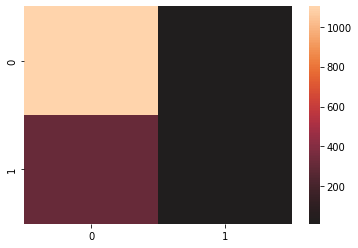

In [ ]:
sns.heatmap(cm, center=True)